# Clase 02 - Visualización de datos

Profesor: **Fernando Becerra**, f.becerra@udd.cl, [www.fernandobecerra.com](www.fernandobecerra.com)

En esta segunda clase ahondaremos más en las distintas formas de gráficar datos, a la vez que empezaremos a ocupar buenas prácticas para hacer más efectiva la visualización y la comunicación de ideas. Además de las librerías ya ocupadas en la primera clase, esta vez también ocuparemos [seaborn](http://seaborn.pydata.org).

## Un grupo de datos, muchas representaciones

Primero, importamos las librerías que ocuparemos para este ejemplo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ahora cargamos los datos, los que corresponden a las muertes registradas por el DEIS del Ministerio de Salud, desde el 2010 hasta mayo de 2020 para las comunas de la Región Metropolitana.

In [2]:
deaths_file = 'https://raw.githubusercontent.com/jorgeperezrojas/covid19-data/master/csv/muertes_deis/muertes_deis_rm.csv'
deaths_data = pd.read_csv(deaths_file)
deaths_data.head()

,comuna,año,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,Alhué,2020,4.0,4.0,7.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alhué,2019,2.0,NaN,5.0,3.0,2.0,6.0,2.0,NaN,4.0,3.0,4.0,5.0
2,Alhué,2018,1.0,2.0,2.0,8.0,1.0,5.0,1.0,4.0,8.0,6.0,3.0,NaN
3,Alhué,2017,3.0,4.0,2.0,4.0,3.0,3.0,1.0,2.0,6.0,1.0,2.0,2.0
4,Alhué,2016,5.0,NaN,1.0,2.0,1.0,3.0,4.0,2.0,1.0,4.0,5.0,4.0


Queremos ver la evolución del número de personas fallecidas en el tiempo, para lo cual nos enfocaremos en una sóla comuna.

In [3]:
comuna = "Cerro Navia"
data = (
    deaths_data[deaths_data['comuna'] == comuna]
        .drop(['comuna'], axis=1)
        .set_index('año')
)
data.head()

,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
año,,,,,,,,,,,,
2020,66.0,54.0,86.0,75.0,154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,64.0,78.0,60.0,83.0,76.0,97.0,95.0,84.0,85.0,66.0,83.0,52.0
2018,70.0,61.0,67.0,59.0,99.0,84.0,83.0,103.0,90.0,77.0,76.0,75.0
2017,76.0,58.0,62.0,65.0,90.0,87.0,99.0,93.0,85.0,74.0,65.0,76.0
2016,67.0,71.0,77.0,69.0,87.0,80.0,94.0,98.0,91.0,54.0,61.0,63.0


Lo más intuitivo (fijación de diseño) es graficarlas como líneas. Para eso, graficaremos cada año por separado.

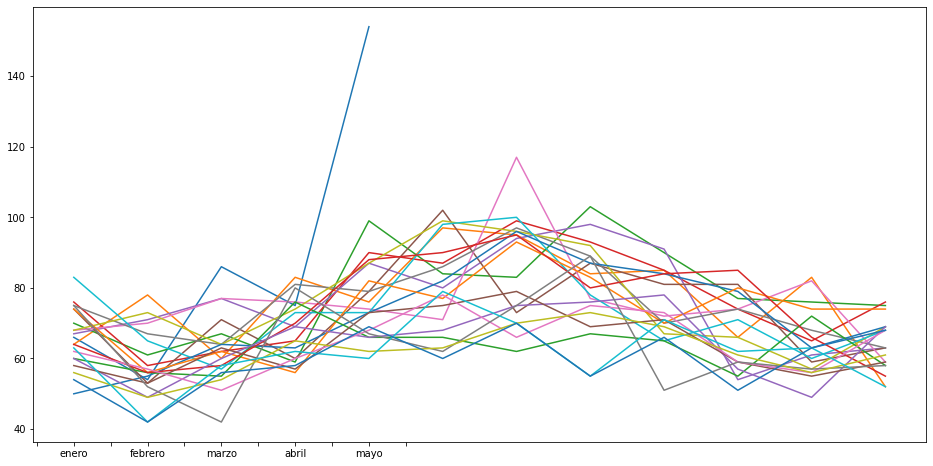

In [4]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in data.index:
    data.loc[year].plot.line(ax=ax)
    
plt.show()

Hay varias cosas que tenemos que arreglar para hacer el gráfico más legible. Por ejemplo, los ticks del eje x no están bien posicionados, no sabemos que año corresponder a que año, entre otros.

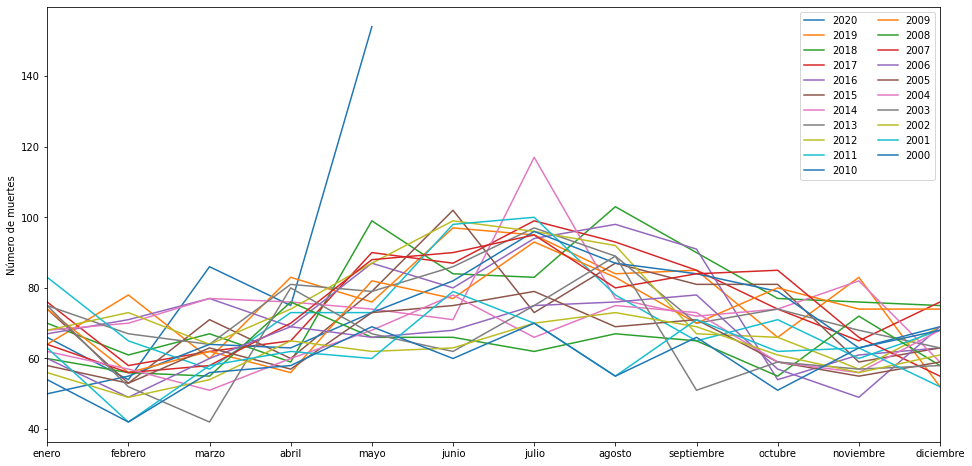

In [5]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in data.index:
    data.loc[year].plot.line(ax=ax)
    
ax.set_xlim(0, 11)
ax.set_xticks(np.arange(0, 12))
ax.set_xticklabels(data.keys())
ax.set_ylabel("Número de muertes")
ax.legend(ncol=2)
    
plt.show()

*Paréntesis*: con la función `ax.set()` nos podemos ahorrar algo de sintaxis.

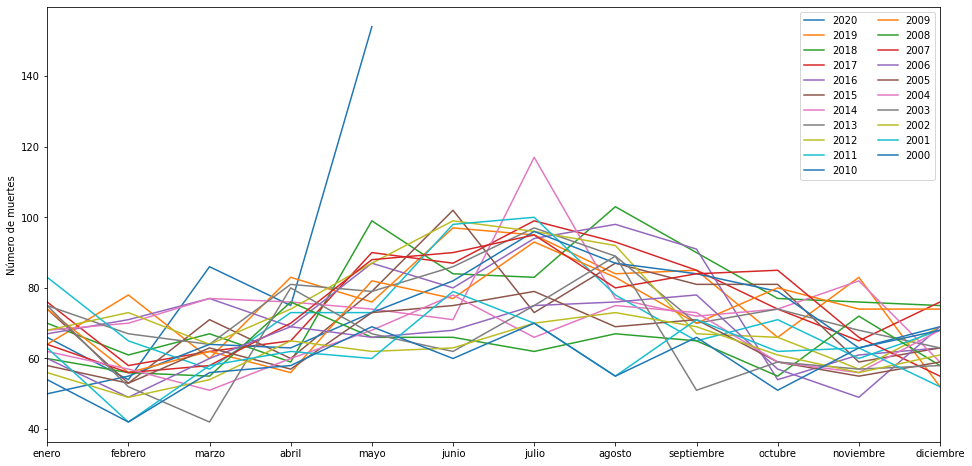

In [6]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in data.index:
    data.loc[year].plot.line(ax=ax)
    
ax.set(xlim=(0,11),
       xticks=np.arange(0, 12),
       xticklabels = data.keys(),
       ylabel="Número de muertes")
ax.legend(ncol=2)
    
plt.show()

La distinción entre diferentes años sigue siendo confuso. Una solución es usar una escala o un mapa de colores secuencial que le asisgne un color distinto a cada año y que a la vez haga sencillo seguir la evolución entre años.

In [7]:
from matplotlib import cm
from matplotlib.colors import Normalize

Definimos una función para calcular el color de cada línea. Para eso tenemos que normalizar los años, ya que la escala de colores recibe un argumento entre 0 y 1.

In [8]:
min_year = data.index.min()
max_year = data.index.max()
    
viridis = cm.get_cmap('viridis')
norm = Normalize(vmin=min_year, vmax=max_year)

# Function that returns the color for a given year
def get_color(yr):
    color_number = (yr - min_year) / (max_year - min_year)
    return viridis(color_number)

Ahora el gráfico se hace un poco más legible.

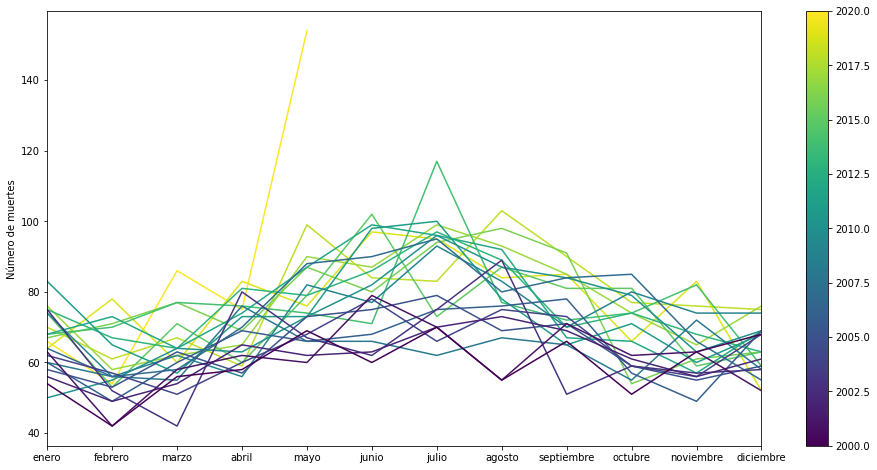

In [9]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in data.index:
    data.loc[year].plot.line(ax=ax, c=get_color(year))
    
ax.set(xlim=(0,11),
       xticks=np.arange(0, 12),
       xticklabels = data.keys(),
       ylabel="Número de muertes")
# ax.legend(ncol=2)
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax)
    
plt.show()

¿Hay alguna forma mejor de visualizar estos datos? Depende mucho de la intención y de lo que queremos transmitir con nuestros gráficos. En el caso anterior es muy fácil distinguir el aumento de fallecimientos en el años 2020 y un leve aumento cada año durante invierno, lo que es esperable. Dicho esto, veamos otra forma de graficarlos y comparemos.

In [10]:
import seaborn as sns

Ocuparemos algo que se llama "heatmap" o mapa de calor. Ocuparemos la configuración por defecto por ahora.

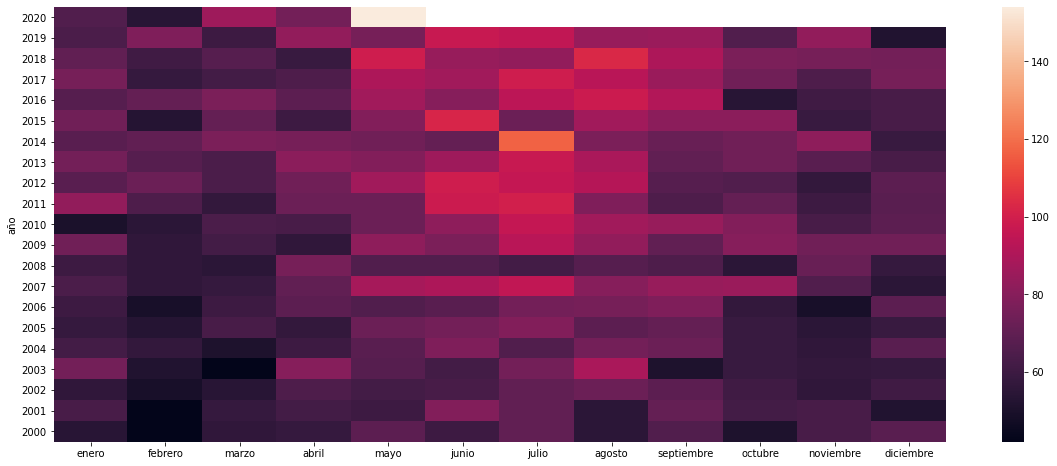

In [11]:
fig, ax = plt.subplots(1,1, figsize=(20,8))
sns.heatmap(data, ax=ax)
plt.show()

Cambiemos el mapa de color para dejar en oscuro un número mayor de fallecimientos. (¿Hay alguna intención en esa elección de colores?

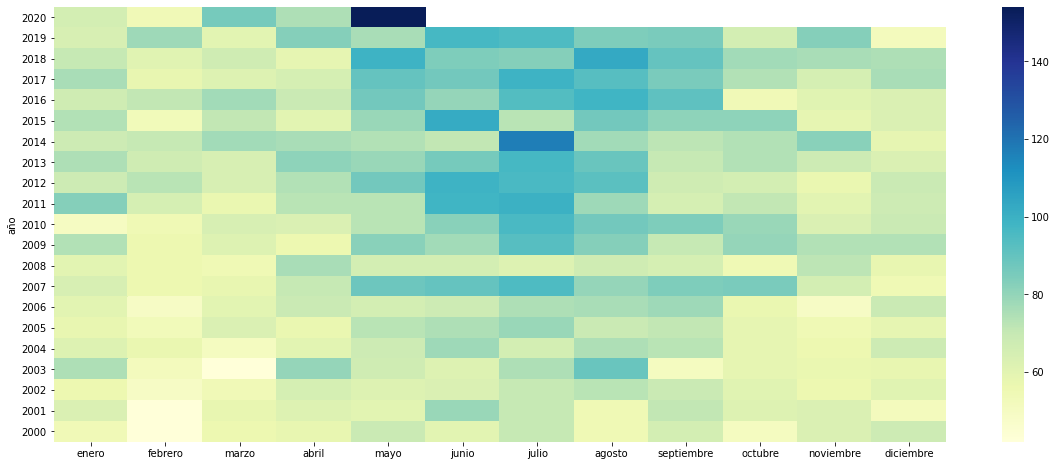

In [12]:
fig, ax = plt.subplots(1,1, figsize=(20,8))
sns.heatmap(data, ax=ax, cmap='YlGnBu')
plt.show()

¡Grafiquemos todas las columnas ahora para explorar los datos!

In [13]:
def plot_comuna(comuna, ax):
    data = (
        deaths_data[deaths_data['comuna'] == comuna]
            .drop(['comuna'], axis=1)
            .set_index('año')
        )
    sns.heatmap(data, ax=ax, cmap='YlGnBu', xticklabels=3, yticklabels=False)
    ax.set_title(comuna, fontsize=24)

In [14]:
comunas = deaths_data['comuna'].unique()
comunas

array(['Alhué', 'Buin', 'Calera de Tango', 'Cerrillos', 'Cerro Navia',
       'Colina', 'Conchalí', 'Curacaví', 'El Bosque', 'El Monte',
       'Estación Central', 'Huechuraba', 'Independencia',
       'Isla de Maipo', 'La Cisterna', 'La Florida', 'La Granja',
       'La Pintana', 'La Reina', 'Lampa', 'Las Condes', 'Lo Barnechea',
       'Lo Espejo', 'Lo Prado', 'Macul', 'Maipú', 'María Pinto',
       'Melipilla', 'Ñuñoa', 'Padre Hurtado', 'Paine',
       'Pedro Aguirre Cerda', 'Peñaflor', 'Peñalolén', 'Pirque',
       'Providencia', 'Pudahuel', 'Puente Alto', 'Quilicura',
       'Quinta Normal', 'Recoleta', 'Renca', 'San Bernardo',
       'San Joaquín', 'San José de Maipo', 'San Miguel', 'San Pedro',
       'San Ramón', 'Santiago', 'Talagante', 'Tiltil', 'Vitacura'],
      dtype=object)

In [15]:
ncomunas = len(comunas)
cols = 4
rows = int(ncomunas/cols)

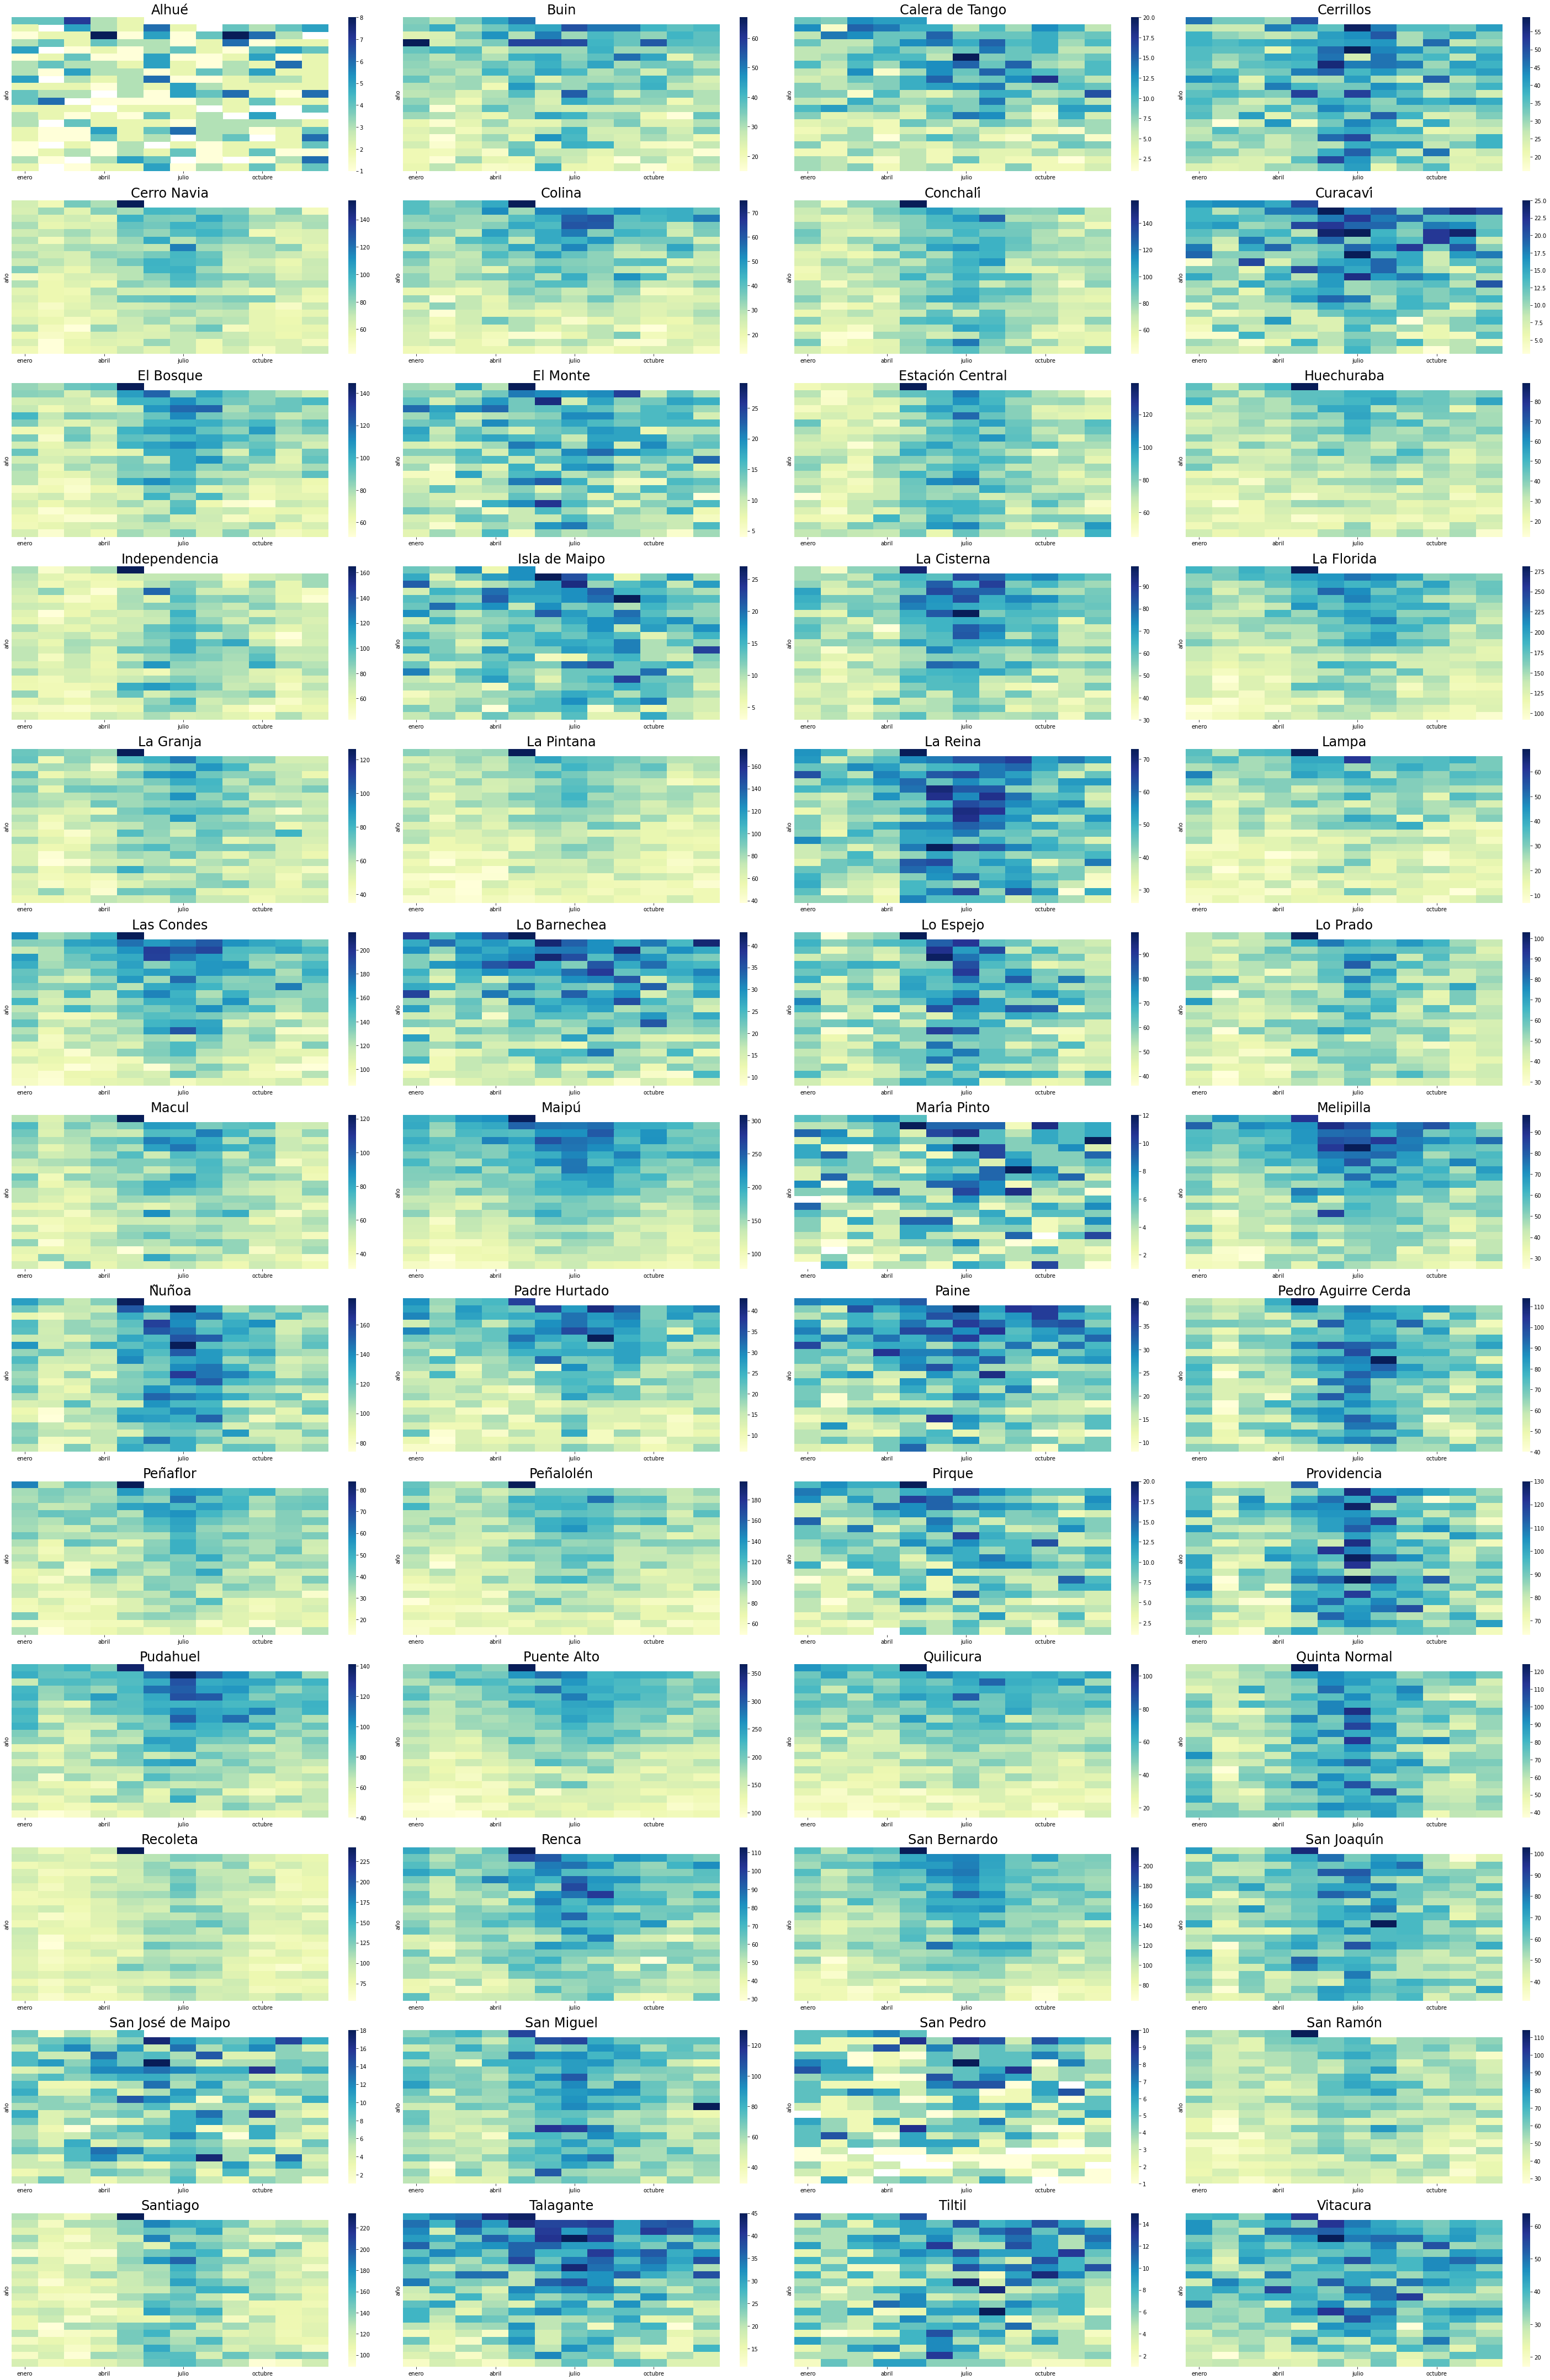

In [16]:
fig, ax = plt.subplots(rows, cols, figsize=(40,60))

for idx_comuna, comuna in enumerate(comunas):
    row = int(idx_comuna / cols)
    col = idx_comuna % cols
    plot_comuna(comuna, ax[row][col])
    
fig.tight_layout()

Podemos elegir la misma escala de colores para todas las comunas para hacer más fácil la comparación entre ellas, pero en ese caso el mensaje que se transmite es totalmente distinto.

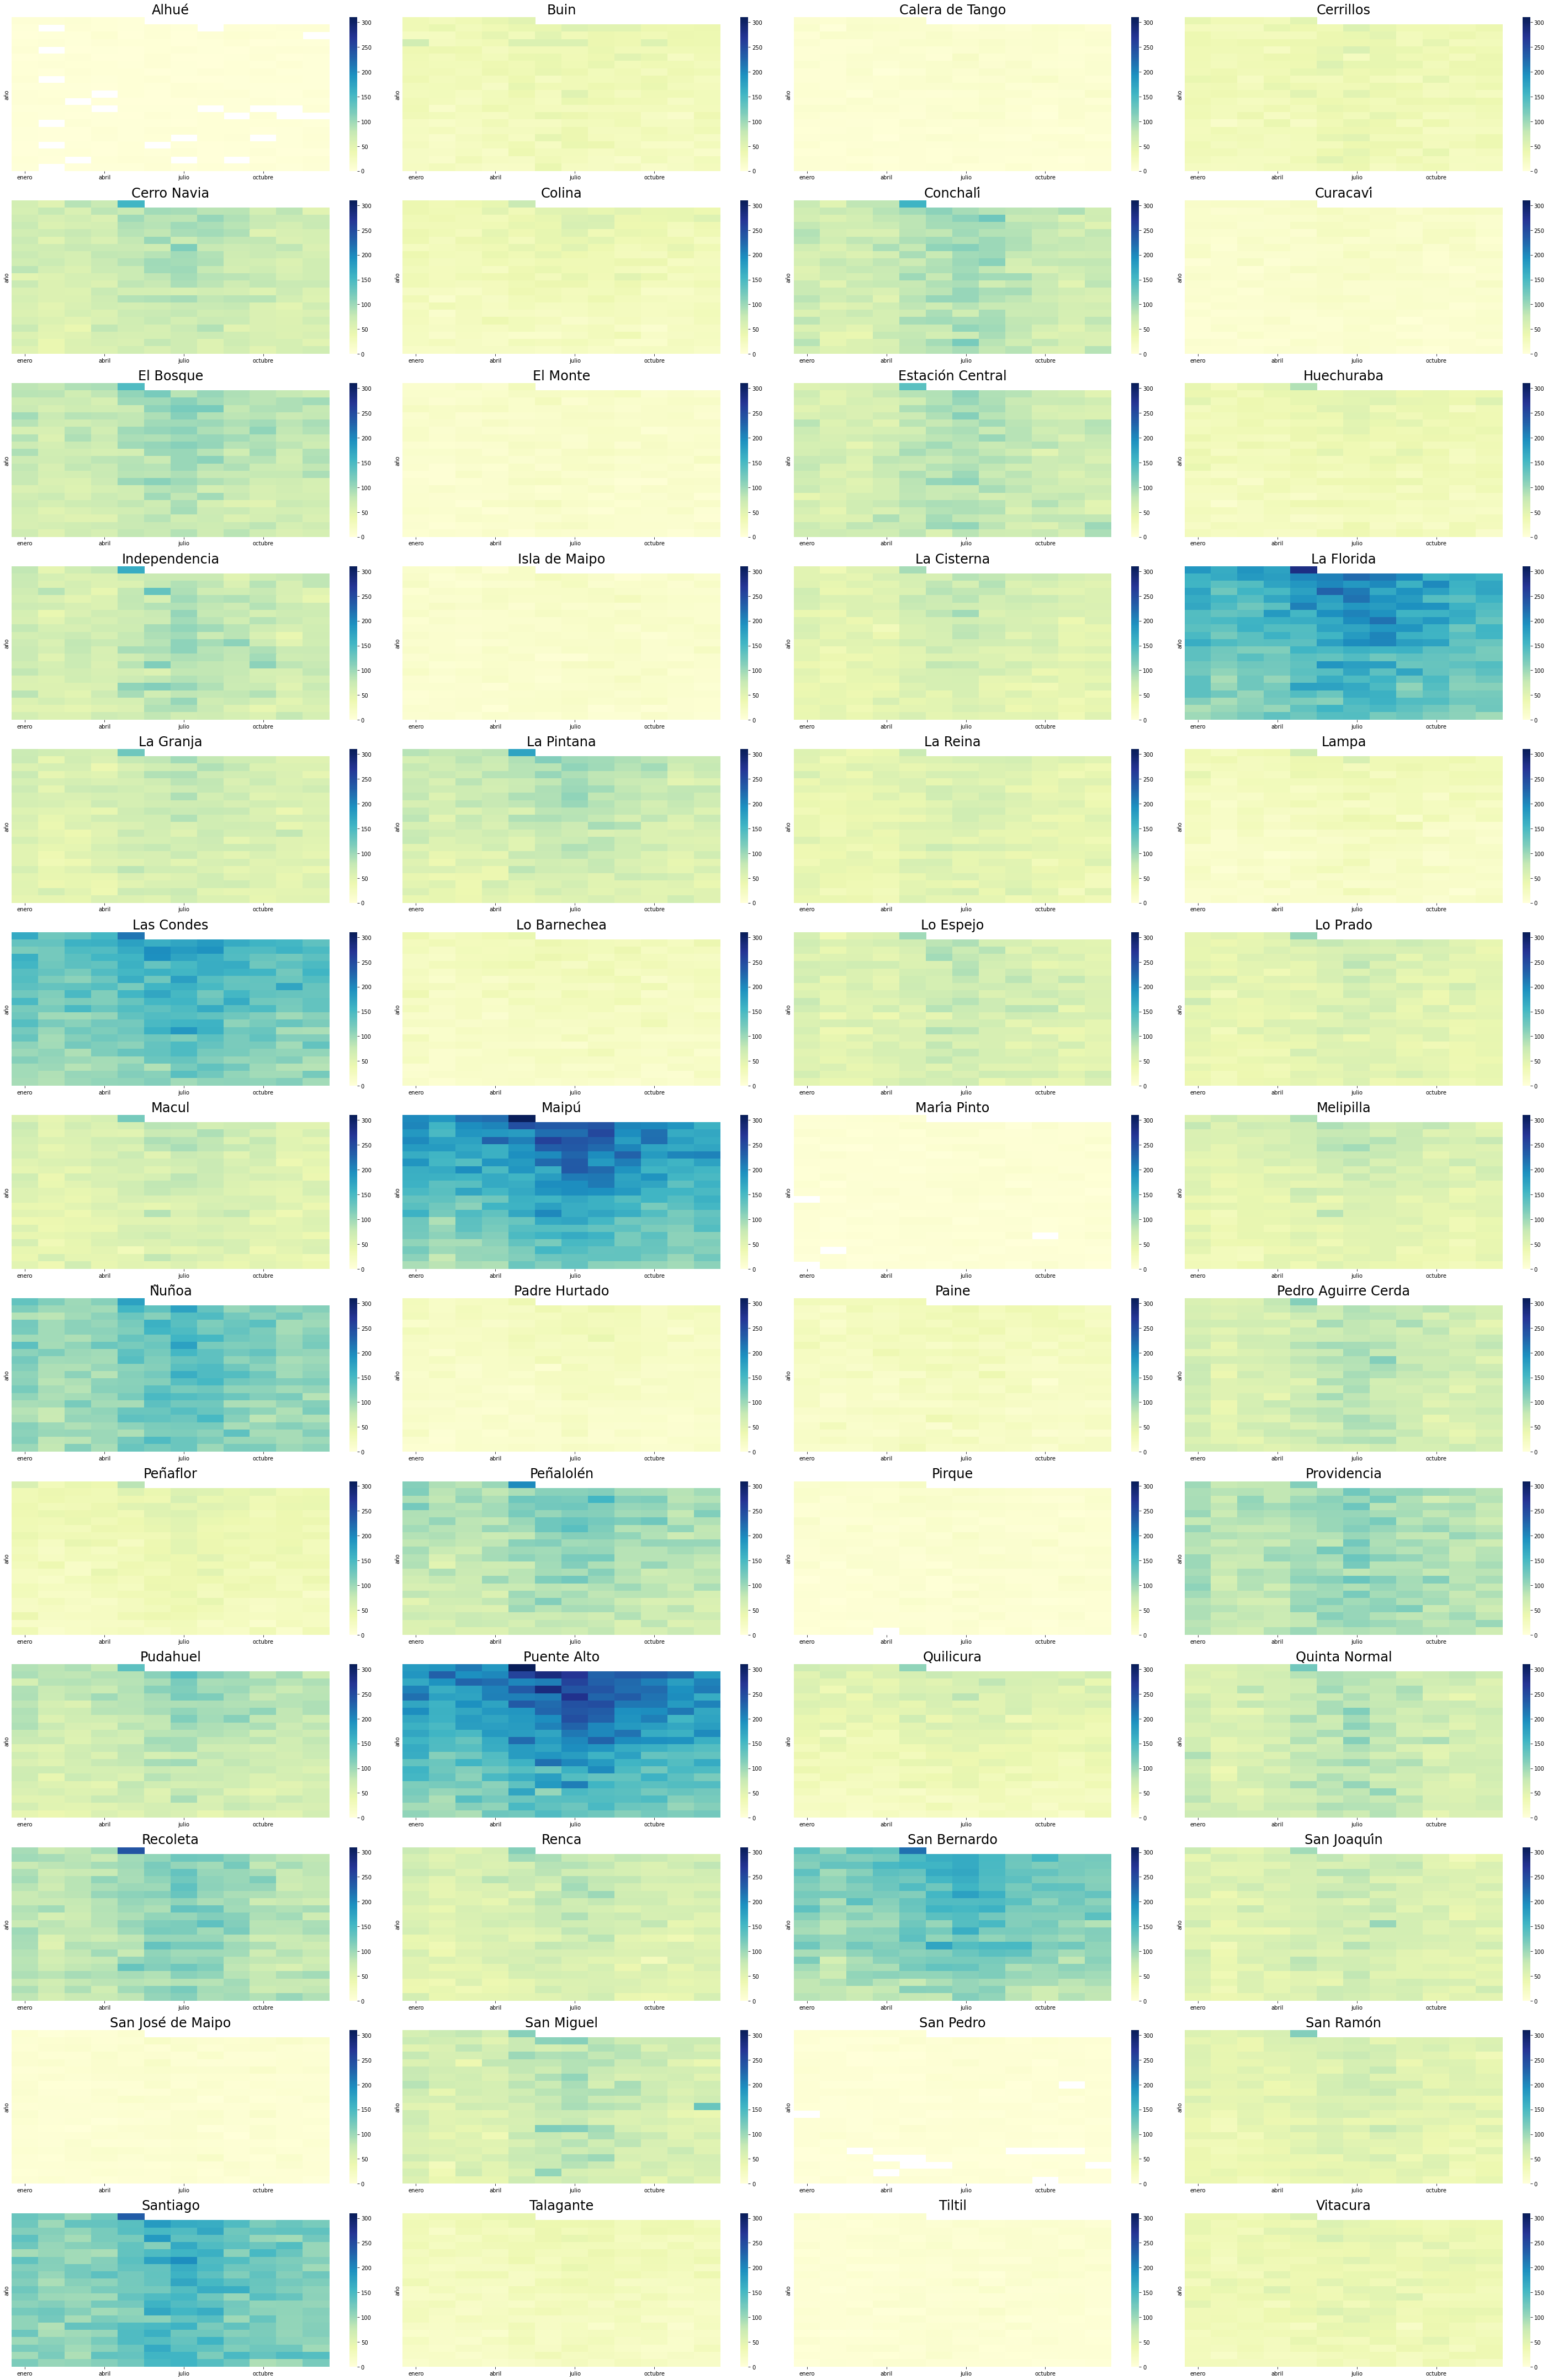

In [17]:
def plot_comuna(comuna, ax):
    data = (
        deaths_data[deaths_data['comuna'] == comuna]
            .drop(['comuna'], axis=1)
            .set_index('año')
        )
    sns.heatmap(data, ax=ax, cmap='YlGnBu', xticklabels=3, yticklabels=False, vmin=0, vmax=310)
    ax.set_title(comuna, fontsize=24)
    
fig, ax = plt.subplots(rows, cols, figsize=(40,60))

for idx_comuna, comuna in enumerate(comunas):
    row = int(idx_comuna / cols)
    col = idx_comuna % cols
    plot_comuna(comuna, ax[row][col])
    
fig.tight_layout()

Ahora el color grafica el número de fallecidos, no el año. Esto hace notar patrones de forma más fácil. Ambas visualizaciones son válidas, pero comunican mensajes diferentes y buscan un objetivo distinto.

Hablando de heatmaps, probemos uno más. Este se basa en datos de la Encuesta Origen Destino sacados de https://github.com/zorzalerrante/.

In [18]:
viajes_persona = pd.read_csv('https://raw.githubusercontent.com/fbecerra/dataexperiments/master/data/eod_processed.csv')
viajes_persona.head()

,Hogar,Persona,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,...,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,FactorHogar,PesoLaboral
0,173431,17343102,1,Maipú,Maipú,Poniente,Poniente,400,407,335208.7188,...,0,0,2,81067.0,1,120000,0,789356,76.81028,142.337500
1,173431,17343102,1,Maipú,Maipú,Poniente,Poniente,407,400,338812.2813,...,0,0,2,81067.0,1,120000,0,789356,76.81028,142.337500
2,173441,17344101,2,Maipú,Las Condes,Poniente,Oriente,407,307,338536.4375,...,0,0,2,57000.0,0,140000,0,633883,76.81028,127.328613
3,173441,17344101,2,Las Condes,Maipú,Oriente,Poniente,307,407,354267.3438,...,0,0,2,57000.0,0,140000,0,633883,76.81028,127.328613
4,173441,17344103,2,Maipú,Ñuñoa,Poniente,Oriente,407,437,338536.4375,...,0,0,2,57000.0,0,140000,0,633883,76.81028,116.697351


Queremos graficar el flujo de viajes entre comunas.

In [19]:
from sklearn.preprocessing import normalize

def normalize_rows(df):
    df = pd.DataFrame(normalize(df, norm='l1'), index=df.index, columns=df.columns)
    return df

def normalize_columns(df):
    df = pd.DataFrame(normalize(df, norm='l1', axis=0), index=df.index, columns=df.columns)
    return df

In [20]:
flujos = (viajes_persona[pd.notnull(viajes_persona.PesoLaboral) &
                         (viajes_persona.PropositoAgregado.isin(['Estudio', 'Trabajo']))]
          .groupby(['ComunaOrigen', 'ComunaDestino'])
          .agg(n_viajes=('PesoLaboral', 'sum'))
          ['n_viajes'].unstack(fill_value=0)
          .pipe(normalize_rows))

flujos.sample(3)

ComunaDestino,Calera de Tango,Cerrillos,Cerro Navia,Colina,Conchalí,El Bosque,Estación Central,Huechuraba,Independencia,La Cisterna,...,Quinta Normal,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Vitacura,Ñuñoa
ComunaOrigen,,,,,,,,,,,,,,,,,,,,,
Cerrillos,0.0,0.180996,0.000000,0.000000,0.003192,0.001540,0.064117,0.000000,0.012753,0.041856,...,0.000385,0.003563,0.005908,0.000000,0.014288,0.054064,0.0,0.157612,0.009832,0.006834
Las Condes,0.0,0.002033,0.000182,0.000471,0.000190,0.003698,0.006641,0.016741,0.006190,0.004333,...,0.003487,0.009334,0.012859,0.003177,0.004874,0.006797,0.0,0.163690,0.074483,0.035835
Vitacura,0.0,0.005139,0.000000,0.010311,0.002098,0.000000,0.007191,0.016607,0.016570,0.000000,...,0.000905,0.005805,0.003177,0.006503,0.000831,0.004602,0.0,0.190106,0.174076,0.016687


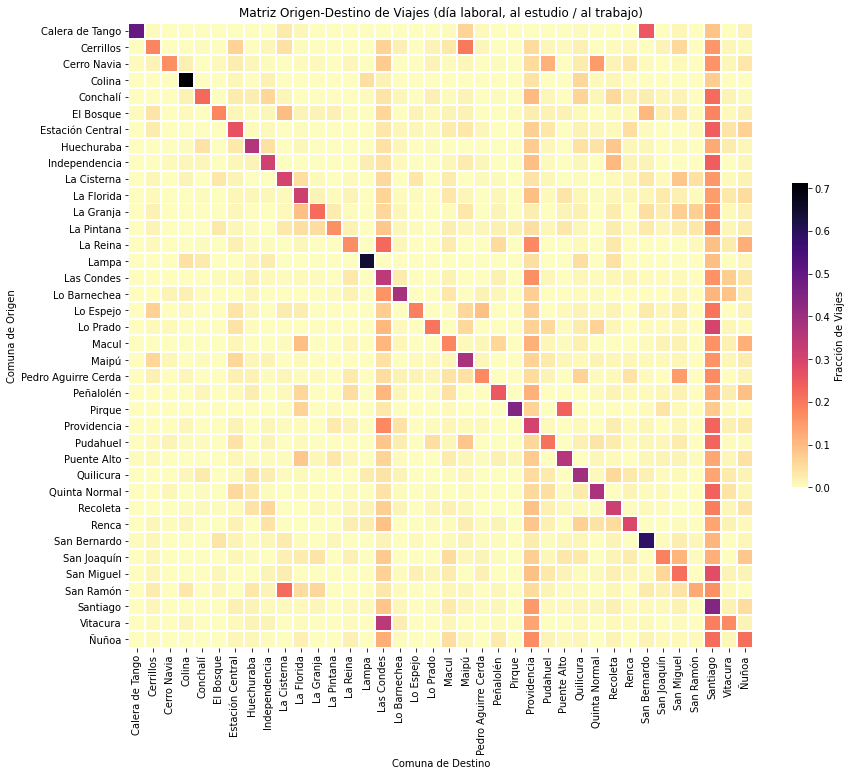

In [21]:
plt.figure(figsize=(14, 14))
sns.heatmap(flujos, cmap='magma_r', square=True, linewidths=1, 
            cbar_kws={'shrink': 0.4, 'label': 'Fracción de Viajes'})
plt.xlabel('Comuna de Destino')
plt.ylabel('Comuna de Origen')
plt.title('Matriz Origen-Destino de Viajes (día laboral, al estudio / al trabajo)')
plt.show()

# Usando buenas prácticas para mejorar una visualización

En esta parte nos enfocaremos en usar buenas prácticas de la visualización de datos para comunicar nuestro mensaje de mejro formar. Ocuparemos datos relativamente sencillos de personas inscritas en los partídos políticos chilenos por sexo.

In [22]:
path = 'https://raw.githubusercontent.com/fbecerra/dataexperiments/master/data/afiliados_partidos_politicos.csv'
df = pd.read_csv(path)
df.head()


,Partido,Mujeres,Hombres
0,CIUDADANOS,10712,8612
1,COMUNISTA DE CHILE,39748,44754
2,CONVERGENCIA SOCIAL,2076,1981
3,DEMOCRATA CRISTIANO,51803,55809
4,ECOLOGISTA VERDE,8771,7641


Calculamos los porcentajes

In [23]:
df['Partido'] = df['Partido'].str.title()
df['Total'] = df['Mujeres'] + df['Hombres']
df['Mujeres (%)'] = df['Mujeres'] / df['Total'] * 100
df['Hombres (%)'] = df['Hombres'] / df['Total'] * 100
df.set_index('Partido', inplace=True)
df.head()

,Mujeres,Hombres,Total,Mujeres (%),Hombres (%)
Partido,,,,,
Ciudadanos,10712,8612,19324,55.433658,44.566342
Comunista De Chile,39748,44754,84502,47.037940,52.962060
Convergencia Social,2076,1981,4057,51.170816,48.829184
Democrata Cristiano,51803,55809,107612,48.138683,51.861317
Ecologista Verde,8771,7641,16412,53.442603,46.557397


Comenzamos por hacer un gráfico básico de barras

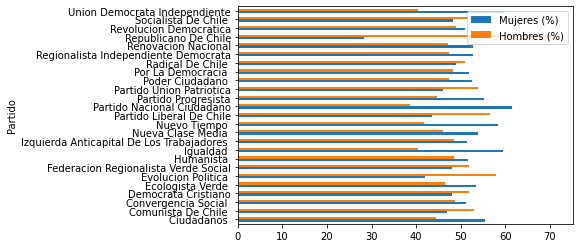

In [24]:
percents = ['Mujeres (%)', 'Hombres (%)']
ax = df[percents].plot.barh()

Usemos una variante conocida como "stack" para poner una barra sobre la otra (o al lado de otra en este caso)

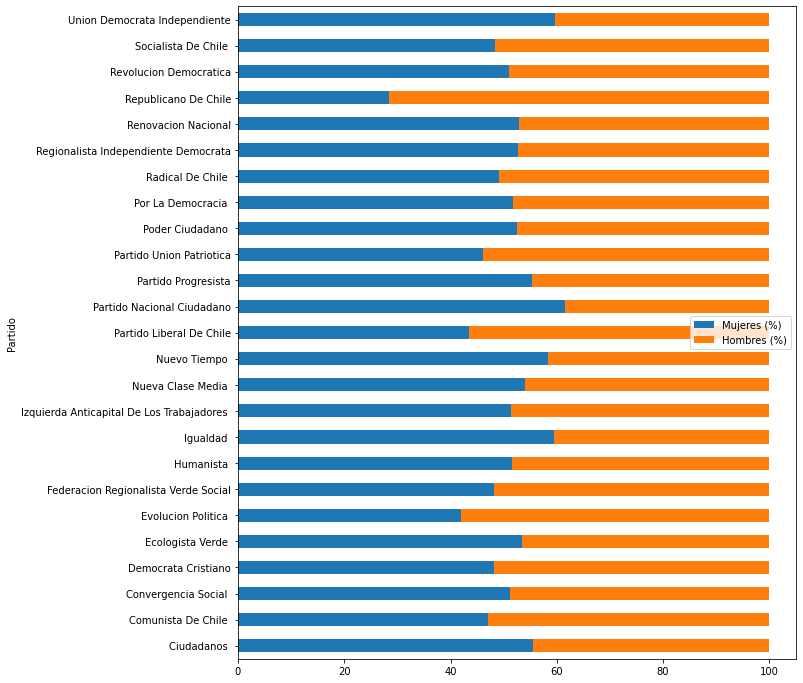

In [25]:
ax = df[percents].plot.barh(stacked=True, figsize=(10, 12))

¿Qué cosas se pueden mejorar de esta visualización? El ancho de las barras, la ubicación de la leyenda, limpiar los nombres de los ejes, y otras cosas más. Iremos paso a paso y partiremos por arreglar el ancho de las barras, los límites del eje y, y la leyenda.

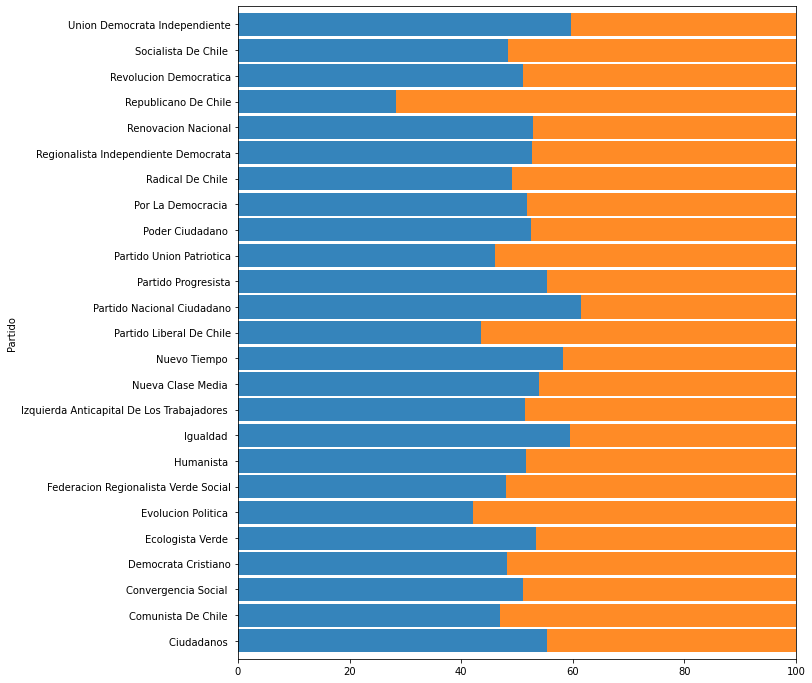

In [26]:
ax = df[percents].plot.barh(stacked=True, figsize=(10, 12), legend=False, width=0.9, alpha=0.9, xlim=(0, 100))

Para que se vea mejor, ordenaremos los datos en base al porcentaje de mujeres inscritas en cada partido. Ahora ya estamos haciendo elecciones conscientes de qué y cómo visualizar nuestros datos para comunicar un mensaje.

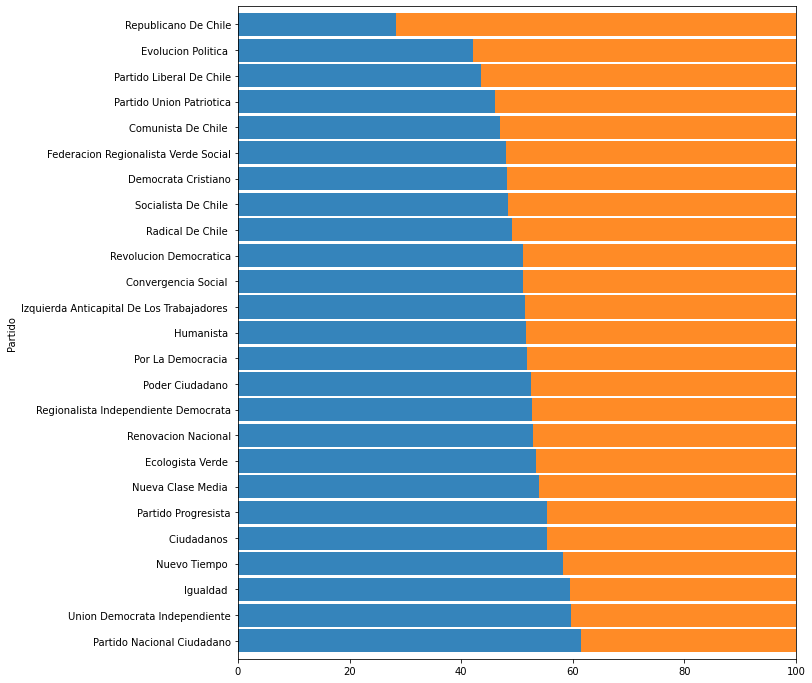

In [27]:
df_sorted = df[percents].sort_values(by=percents[0], ascending=False)
ax = df_sorted.plot.barh(stacked=True, figsize=(10, 12), legend=False, width=0.9, alpha=0.9, xlim=(0, 100))

Ahora eliminemos los border de la caja que no agregan nada

In [28]:
def hide_border(ax):
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

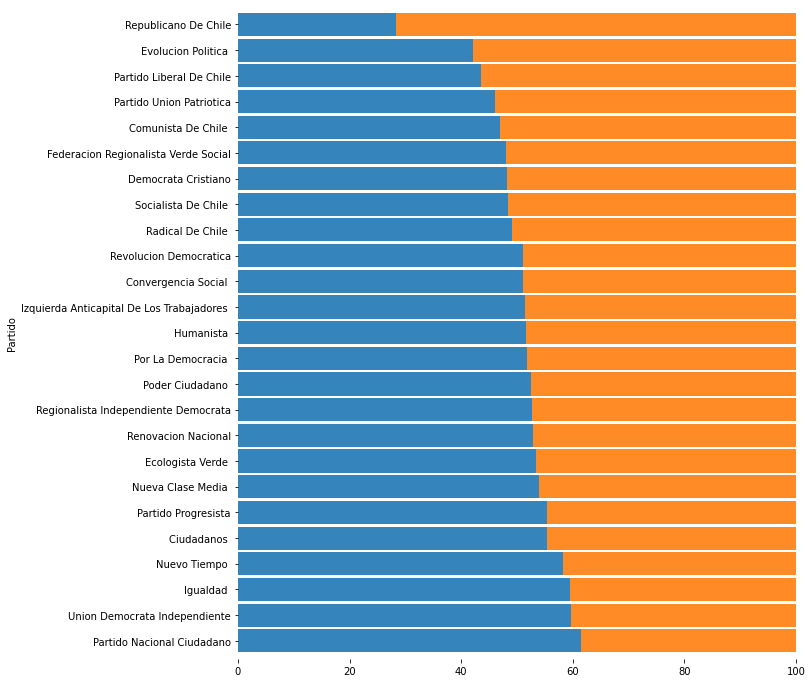

In [29]:
ax = df_sorted.plot.barh(stacked=True, figsize=(10, 12), legend=False, width=0.9, alpha=0.9, xlim=(0, 100))
hide_border(ax)

Lo mismo con las marcas de los ejes

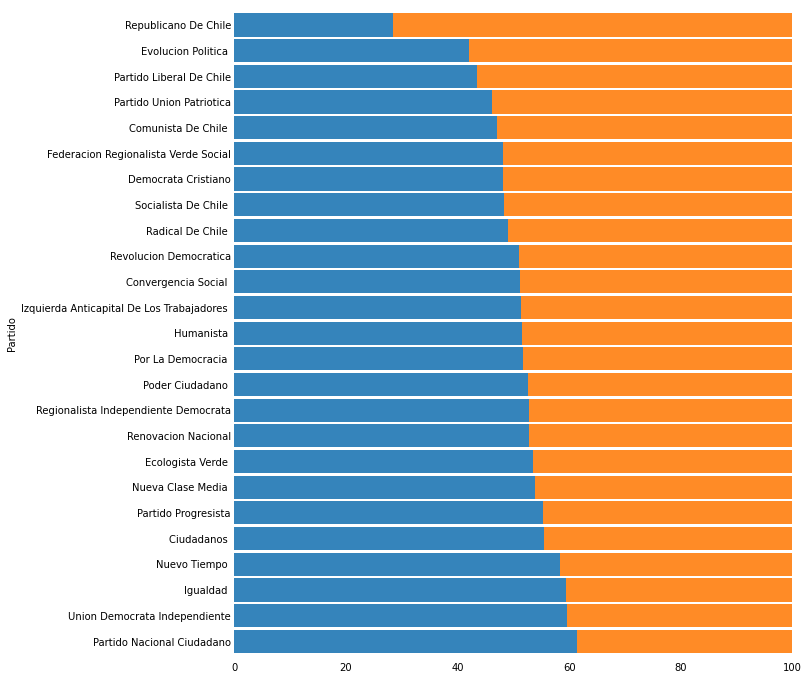

In [30]:
ax = df_sorted.plot.barh(stacked=True, figsize=(10, 12), legend=False, width=0.9, alpha=0.9, xlim=(0, 100))
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both', length=0)

Borramos el nombre del eje y que no ayuda mucho, pero agregamos esa información en el título del gráfico para que no se pierda

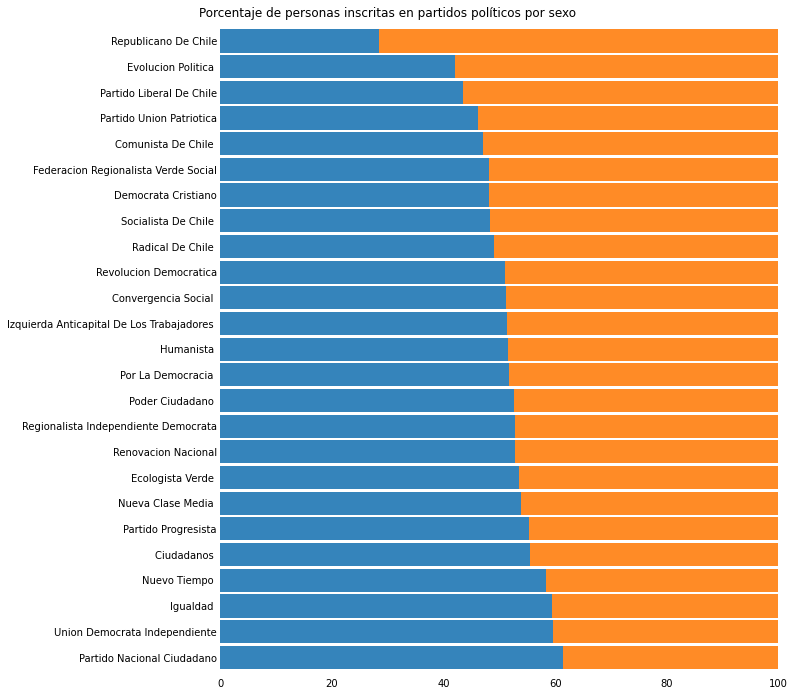

In [31]:
ax = df_sorted.plot.barh(stacked=True, figsize=(10, 12), legend=False, width=0.9, alpha=0.9, xlim=(0, 100))
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_ylabel('')
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo")
ax.title.set_position([.3, 1.03])

plt.show()

Agregamos unos textos para indicar qué es lo que estamos gráficando. Esto viene a reemplazar la leyenda que ya borramos.

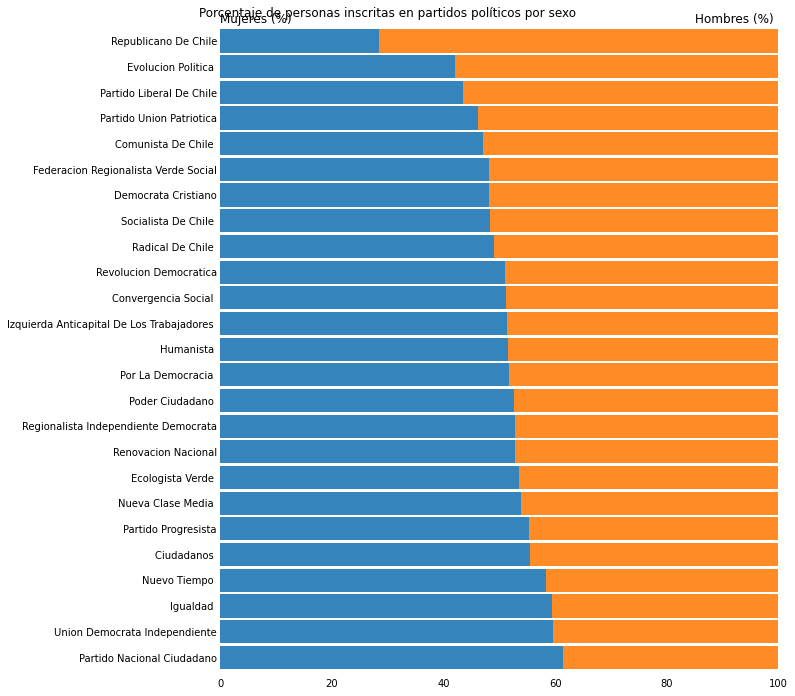

In [32]:
fontsize=12

ax = df_sorted.plot.barh(stacked=True, figsize=(10, 12), legend=False, width=0.9, alpha=0.9, xlim=(0, 100))
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_ylabel('')
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo")
ax.title.set_position([.3, 1.03])
ax.text(0, df_sorted.shape[0]-0.3, percents[0], fontsize=fontsize)
ax.text(85, df_sorted.shape[0]-0.3, percents[1], fontsize=fontsize)

plt.show()

Agregamos espacio al título

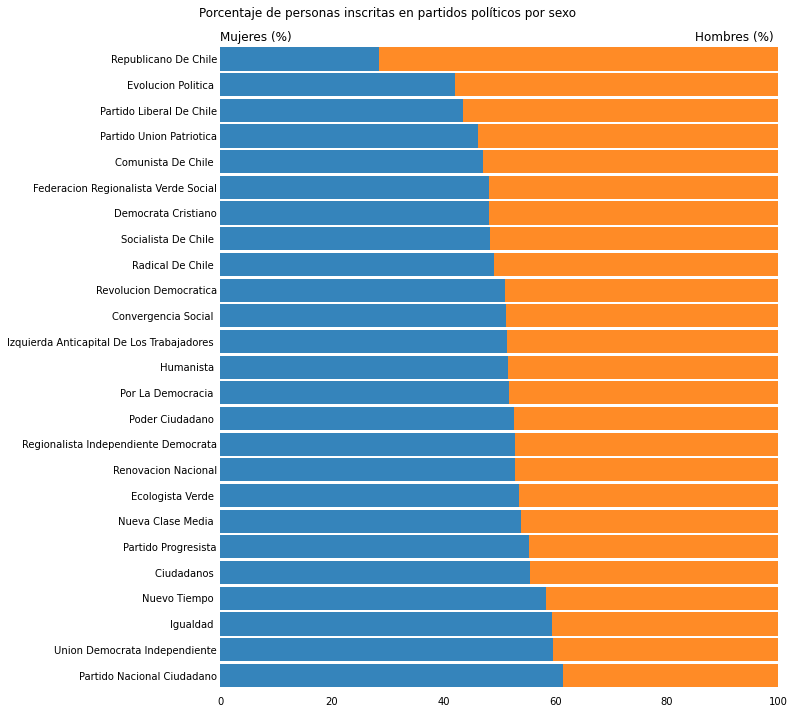

In [33]:
fontsize=12

ax = df_sorted.plot.barh(stacked=True, figsize=(10, 12), legend=False, width=0.9, alpha=0.9, xlim=(0, 100))
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_ylabel('')
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo", pad=24)
ax.title.set_position([.3, 1.03])
ax.text(0, df_sorted.shape[0]-0.3, percents[0], fontsize=fontsize)
ax.text(85, df_sorted.shape[0]-0.3, percents[1], fontsize=fontsize)

plt.show()

De momeno hemos ocupado los colores que matplotlib usa por defecto, pero ¿cuál es el problema con eso? Es mejor hacer una elección consciene de qué color ocuparemos y para qué, de esta forma también nos permite hacer conexiones entre, por ejemplo, las barras y la leyenda.

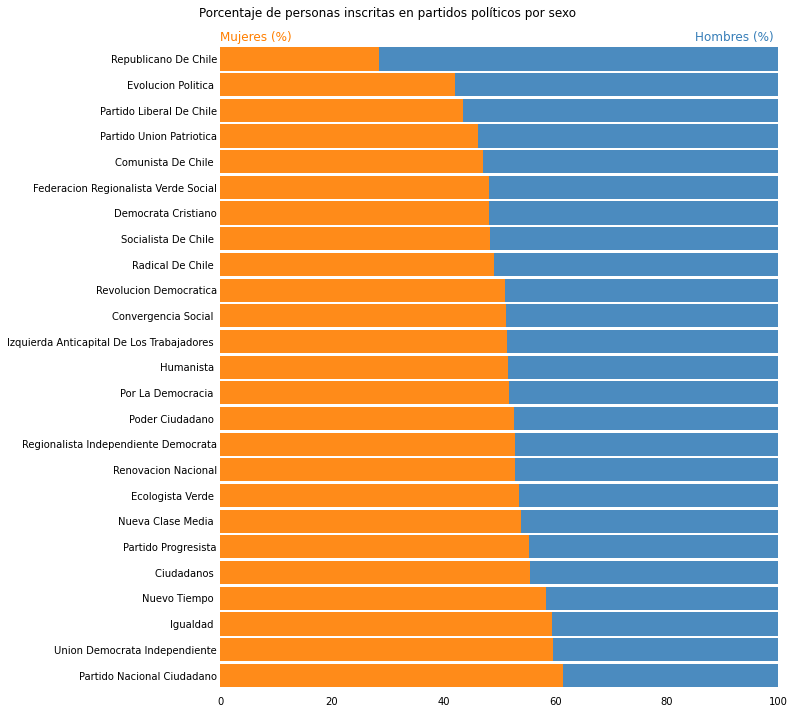

In [34]:
fontsize=12
colors = ['#ff7f00', '#377eb8']

ax = df_sorted.plot.barh(stacked=True, figsize=(10, 12), legend=False, width=0.9, alpha=0.9, xlim=(0, 100),
                        color=colors)
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_ylabel('')
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo", pad=24)
ax.title.set_position([.3, 1.03])
ax.text(0, df_sorted.shape[0]-0.3, percents[0], color=colors[0], fontsize=fontsize)
ax.text(85, df_sorted.shape[0]-0.3, percents[1], color=colors[1], fontsize=fontsize)

plt.show()

También resaltamos el título para que no se pierda entre el resto del gráfico.

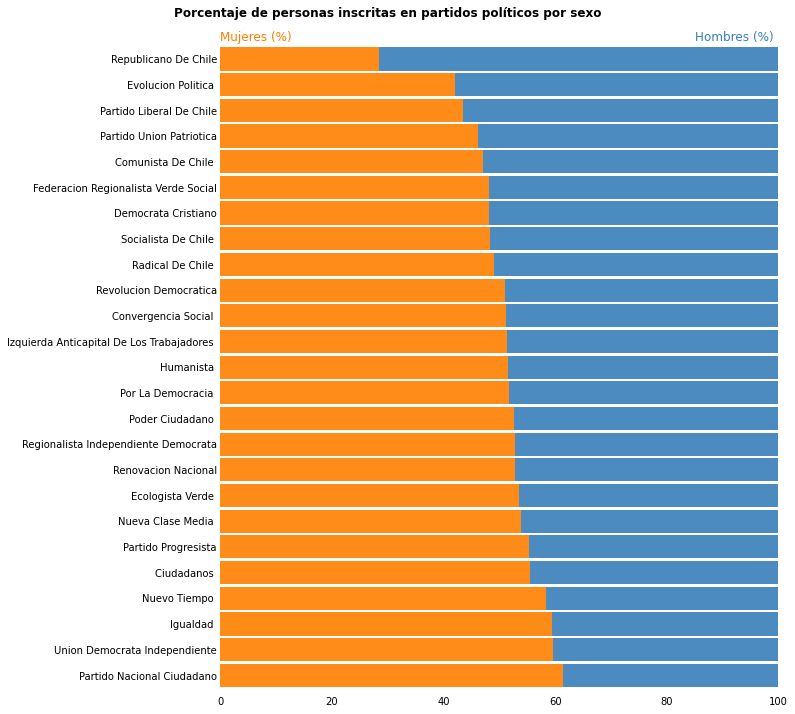

In [35]:
fontsize=12
colors = ['#ff7f00', '#377eb8']

ax = df_sorted.plot.barh(stacked=True, figsize=(10, 12), legend=False, width=0.9, alpha=0.9, xlim=(0, 100),
                        color=colors)
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_ylabel('')
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo", pad=24, fontweight=700)
ax.title.set_position([.3, 1.03])
ax.text(0, df_sorted.shape[0]-0.3, percents[0], color=colors[0], fontsize=fontsize)
ax.text(85, df_sorted.shape[0]-0.3, percents[1], color=colors[1], fontsize=fontsize)

plt.show()

Adicionalmente, si queremos comunicar los valores exactos de cada porcentaje, podemos agregarlos como texto dentro de las mismas barras, y con eso también podemos deshacernos de los ticks del eje x

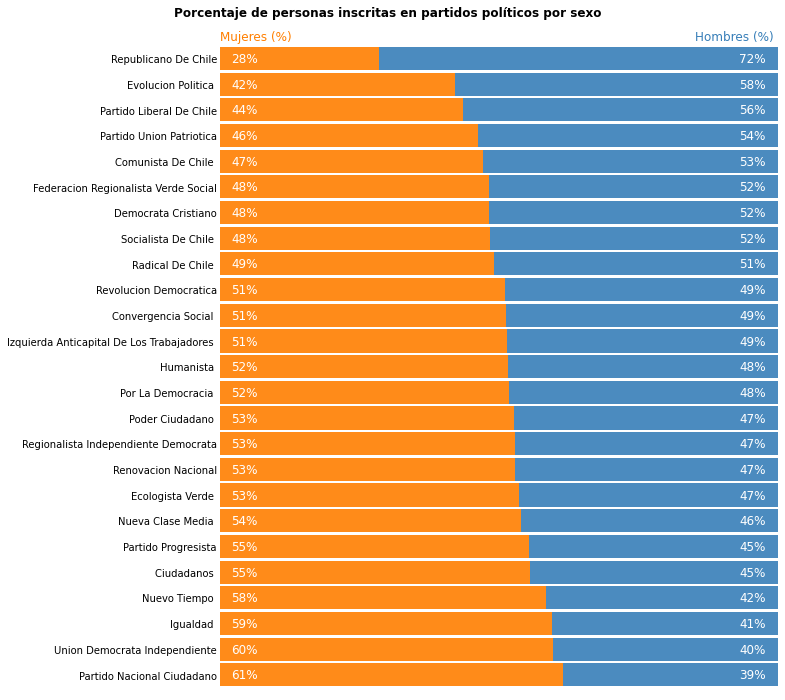

In [36]:
fontsize=12
colors = ['#ff7f00', '#377eb8']

ax = df_sorted.plot.barh(stacked=True, figsize=(10, 12), legend=False, width=0.9, alpha=0.9, xlim=(0, 100),
                        color=colors)
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_ylabel('')
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo", pad=24, fontweight=700)
ax.title.set_position([.3, 1.03])
ax.text(0, df_sorted.shape[0]-0.3, percents[0], color=colors[0], fontsize=fontsize)
ax.text(85, df_sorted.shape[0]-0.3, percents[1], color=colors[1], fontsize=fontsize)

ax.xaxis.set_ticks([])
for p in ax.patches:
    if p.xy[0] == 0:
        xpos = 2
    else:
        xpos = 93
    ax.annotate(str(int(round(p.get_width()))) + "%", (xpos, p.xy[1] + 0.3), color='white', fontsize=fontsize)

plt.show()

El enfoque de este gráfico puede cambiar totalmente si elegimos otros colores.

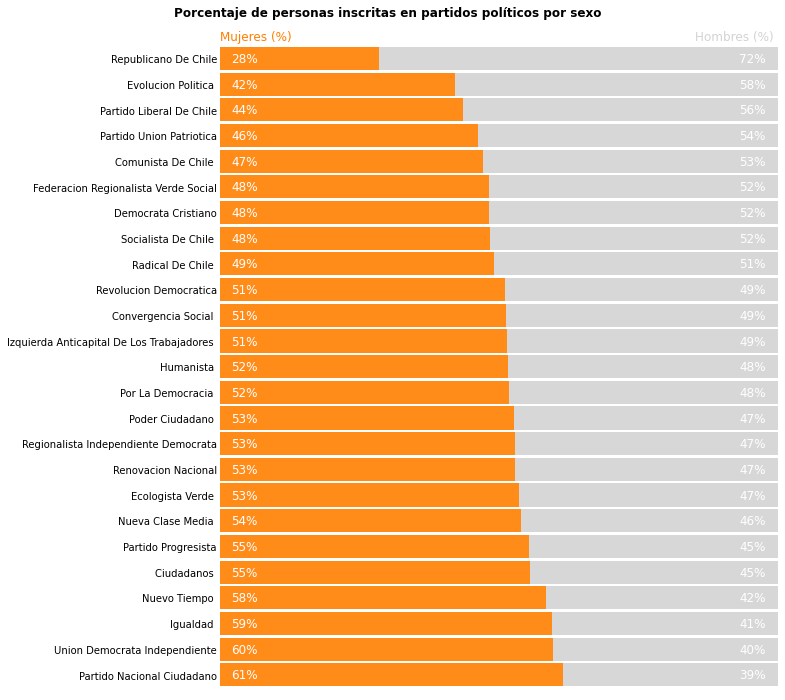

In [37]:

fontsize=12
colors = ['#ff7f00', '#d3d3d3']

ax = df_sorted.plot.barh(stacked=True, figsize=(10, 12), legend=False, width=0.9, alpha=0.9, xlim=(0, 100),
                        color=colors)
hide_border(ax)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_ylabel('')
ax.set_title("Porcentaje de personas inscritas en partidos políticos por sexo", pad=24, fontweight=700)
ax.title.set_position([.3, 1.03])
ax.text(0, df_sorted.shape[0]-0.3, percents[0], color=colors[0], fontsize=fontsize)
ax.text(85, df_sorted.shape[0]-0.3, percents[1], color=colors[1], fontsize=fontsize)

ax.xaxis.set_ticks([])
for p in ax.patches:
    if p.xy[0] == 0:
        xpos = 2
    else:
        xpos = 93
    ax.annotate(str(int(round(p.get_width()))) + "%", (xpos, p.xy[1] + 0.3), color='white', fontsize=fontsize)

plt.show()

Hay muchas otras cosas que se pueden seguir mejorando. En particular, uno hace este tipo de elecciones (cómo ordenar los datos, qué colores usar, qué título ocupar) pensando en el mensaje que uno quiere comunicar.